<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

<br>
<h1 style="font-family:verdana; font-size:26px"> <center>~ Notebook Tugas Besar 2 IF3170 Artificial Intelligence ~</center> </h1>
<br>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# **SatuWardaEmpatBeban**
## Kelompok 24
<p style = "font-size:16px; font-family:verdana">- Wardatul Khoiroh (13523001)<p>

<p style = "font-size:16px; font-family:verdana">- Raka Daffa Iftikhaar (13523018) <p>

<p style = "font-size:16px; font-family:verdana">- Muhammad Fithra Rizki (13523049) <p>

<p style = "font-size:16px; font-family:verdana">- Ahsan Malik Al Farisi (13523074) <p>
    
<p style = "font-size:16px; font-family:verdana">- Farrel Athalla Putra (13523118) <p>

<br>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Daftar Isi

1. [**Introduction**](#1)

2. [**Initialization**](#2)

3. [**Exploratory Data Analysis**](#3)

4. [**Data Cleaning & Preprocessing**](#4)

5. [**Modelling**](#5)
    - 5.1 Decision Tree Learning (C4.5) - From Scratch & Sklearn
    - 5.2 Logistic Regression - From Scratch & Sklearn
    - 5.3 Support Vector Machine (DAGSVM) - From Scratch & Sklearn

6. [**Model Comparison & Evaluation**](#6)

7. [**Error Analysis**](#7)

8. [**Save & Load Model Demonstration**](#8)

9. [**Final Training & Submission**](#9)

10. [**Conclusion**](#10)

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Introduction <a name="1"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## Machine Learning Classification on Student Academic Dataset

*Dataset mahasiswa yang digunakan dalam tugas besar ini berisi informasi demografis, faktor sosial-ekonomi, serta performa akademik. Data tersebut menyediakan landasan yang relevan untuk menganalisis pola serta faktor-faktor yang berpotensi memengaruhi hasil akademik mahasiswa.*

*Dalam tugas besar ini, beberapa algoritma machine learning diterapkan, termasuk Decision Tree Learning (DTL), Logistic Regression, dan Support Vector Machine (SVM), baik melalui implementasi manual (from scratch) maupun menggunakan pustaka scikit-learn. Proses ini mencakup tahap preprocessing, training, evaluasi, serta perbandingan performa antar metode.*

*Tujuan utama dari eksperimen ini adalah membangun model yang mampu melakukan prediksi secara akurat berdasarkan fitur yang tersedia. Selain itu, hasil analisis ini diharapkan dapat memberikan insight yang berguna dalam mendukung keputusan berbasis data dalam konteks pendidikan, terutama terkait peningkatan strategi belajar dan pengelolaan akademik.*

---

## Dataset

*Data bersumber dari dataset yang tersedia di platform Kaggle, khususnya dari kompetisi Data Mining Hology 8.0 dengan pranala: https://www.kaggle.com/competitions/if-3170-tugas-besar-2-student-performance/data .*

*Dataset ini berisi 3098 baris data train serta 1328 baris data test berisi statisik mahasiswa pada proses akademik*

*Dataset ini akan digunakan untuk melatih dan menguji model AI melakukan multiclass classification status kelulusan mahasiswa.*

<br>


```latex
data
│
├── train.csv                            # berisi data untuk pelatihan
│
├── test.csv                             # berisi data untuk evaluasi
│
├── sample_submission.csv                # referensi .csv untuk submisi
│  
└── if-3170-tugas-besar-2-student-performance.zip
```

<br>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Initialization <a name="2"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## Import Libraries

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import matplotlib.ticker as mtick

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Exploratory Data Analysis <a name="3"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Dilakukan EDA terhadap dataset untuk mengetahui bentuk data, kebersihan data, serta sifat dan interaksi setiap fitur pada data

In [2]:
# Load data (gunakan relative path untuk local development)
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (3096, 38)
Test shape: (1328, 37)


In [3]:
train_df.head()

,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,3743,1,17,1,9670,1,1,118.0,1,19,38,7,9,113.5,1,0,0,1,0,1,19,0,0,6,9,5,13.500000,0,0,6,6,6,14.000000,0,12.4,0.5,1.79,Graduate
1,3540,1,1,1,9070,1,1,139.0,1,1,19,3,9,134.9,1,0,0,1,1,0,20,0,0,6,7,6,13.666667,0,0,6,7,6,12.166667,1,16.2,0.3,-0.92,Graduate
2,1118,1,1,1,9500,1,1,138.0,1,38,19,9,5,144.3,0,0,0,1,0,0,20,0,0,7,9,6,12.700000,0,0,8,8,7,13.571429,0,13.9,-0.3,0.79,Graduate
3,791,1,17,1,9773,1,1,138.0,1,1,19,9,9,124.0,0,0,0,1,0,1,19,0,0,6,6,6,13.166667,0,0,6,6,6,13.833333,0,11.1,0.6,2.02,Graduate
4,4381,1,7,1,9500,1,2,140.0,1,38,37,7,8,140.0,0,0,0,1,0,0,29,0,0,8,14,4,11.325000,1,0,8,14,4,11.325000,1,12.7,3.7,-1.70,Dropout


In [4]:
train_df.Target.unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

> ### Insight
Akan dilakukan prediksi terhadap target variable berisikan 3 kategori kelulusan, yaitu Graduate, Dropout, dan Enrolled

In [5]:
train_df.columns

Index(['Student_ID', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curric

> ### Insight
Terdapat nama kolom kotor, yaitu Daytime/evening attendance\t serta typo pada Nacionality (asumsi seharusnya Nationality). Ini harus diperhatikan pada penggunaan kolom nanti

In [6]:
train_df.shape

(3096, 38)

In [7]:
train_df.isnull().sum()

Student_ID                                        0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [8]:
test_df.isnull().sum()

Student_ID                                        0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

> ### Insight
Data train serta test sudah bersih terhadap missing values. Sehingga di masa depan tidak perlu melakukan penanganan imputasi pada data

In [9]:
train_df.duplicated().sum()

np.int64(0)

In [10]:
test_df.duplicated().sum()

np.int64(0)

> ### Insight
Data train serta test juga sudah bersih terhadap duplicate rows sehingga tidak perlu melakukan drop duplicate values

In [11]:
train_df.describe()

,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.00000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000
mean,2201.759690,1.166021,18.372416,1.717700,8832.330749,0.89438,4.672804,132.762435,1.797158,19.361111,22.146641,10.536176,10.743863,126.915698,0.548450,0.011951,0.110142,0.880814,0.354328,0.252584,23.216408,0.023256,0.713501,6.245801,8.242571,4.697674,10.621631,0.140181,0.539729,6.201227,8.015181,4.410853,10.179772,0.141150,11.580749,1.209076,0.006570
std,1275.008676,0.573701,17.456612,1.292362,2116.515003,0.30740,10.387415,13.137942,6.781964,15.568871,15.329250,25.028462,24.464090,14.459928,0.497727,0.108683,0.313117,0.324060,0.478386,0.434565,7.614394,0.150739,2.365945,2.501305,4.186787,3.087995,4.880632,0.672843,1.906634,2.223507,3.966593,3.022767,5.260617,0.718398,2.659685,1.380070,2.268175
min,1.000000,1.000000,1.000000,0.000000,33.000000,0.00000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1102.750000,1.000000,1.000000,1.000000,9085.000000,1.00000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,2212.000000,1.000000,17.000000,1.000000,9238.000000,1.00000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,3303.750000,1.000000,39.000000,2.000000,9556.000000,1.00000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,4424.000000,6.000000,57.000000,9.000000,9991.000000,1.00000,43.000000,190.000000,108.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Student_ID                                      3096 non-null   int64  
 1   Marital status                                  3096 non-null   int64  
 2   Application mode                                3096 non-null   int64  
 3   Application order                               3096 non-null   int64  
 4   Course                                          3096 non-null   int64  
 5   Daytime/evening attendance	                     3096 non-null   int64  
 6   Previous qualification                          3096 non-null   int64  
 7   Previous qualification (grade)                  3096 non-null   float64
 8   Nacionality                                     3096 non-null   int64  
 9   Mother's qualification                   

> ### Insight
Perhatikan bahwa berdasarkan Deskripsi Dataset Tubes 2 IF3170 menyatakan bahwa banyak kolom merupakan kategorical, namun sudah di convert ke numerical. Disini jangan sampai meng-*treat* fitur kategorical tersebut seperti numerikal biasa karena akan melenceng dari *purpose* dan *intended* fitur tersebut.

### 1. Cek Imbalance Target

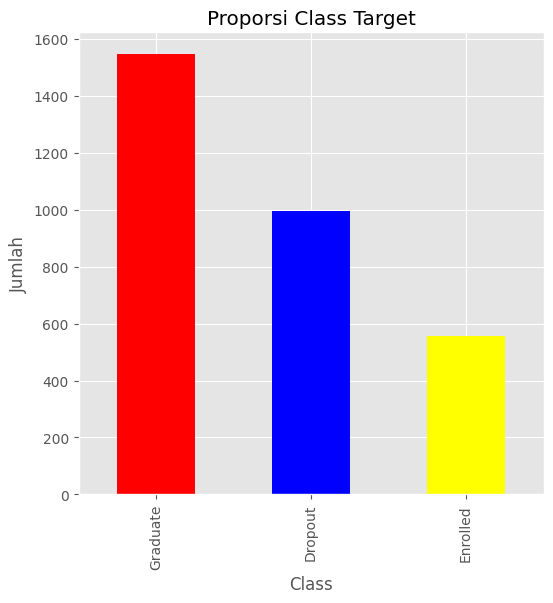

In [13]:
train_df['Target'].value_counts().plot.bar(
    figsize=(6,6),
    color=['red', 'blue', 'yellow']
)

plt.title("Proporsi Class Target")
plt.xlabel("Class")
plt.ylabel("Jumlah")
plt.show()

## 2. Cek Outlier pada Fitur Numerikal

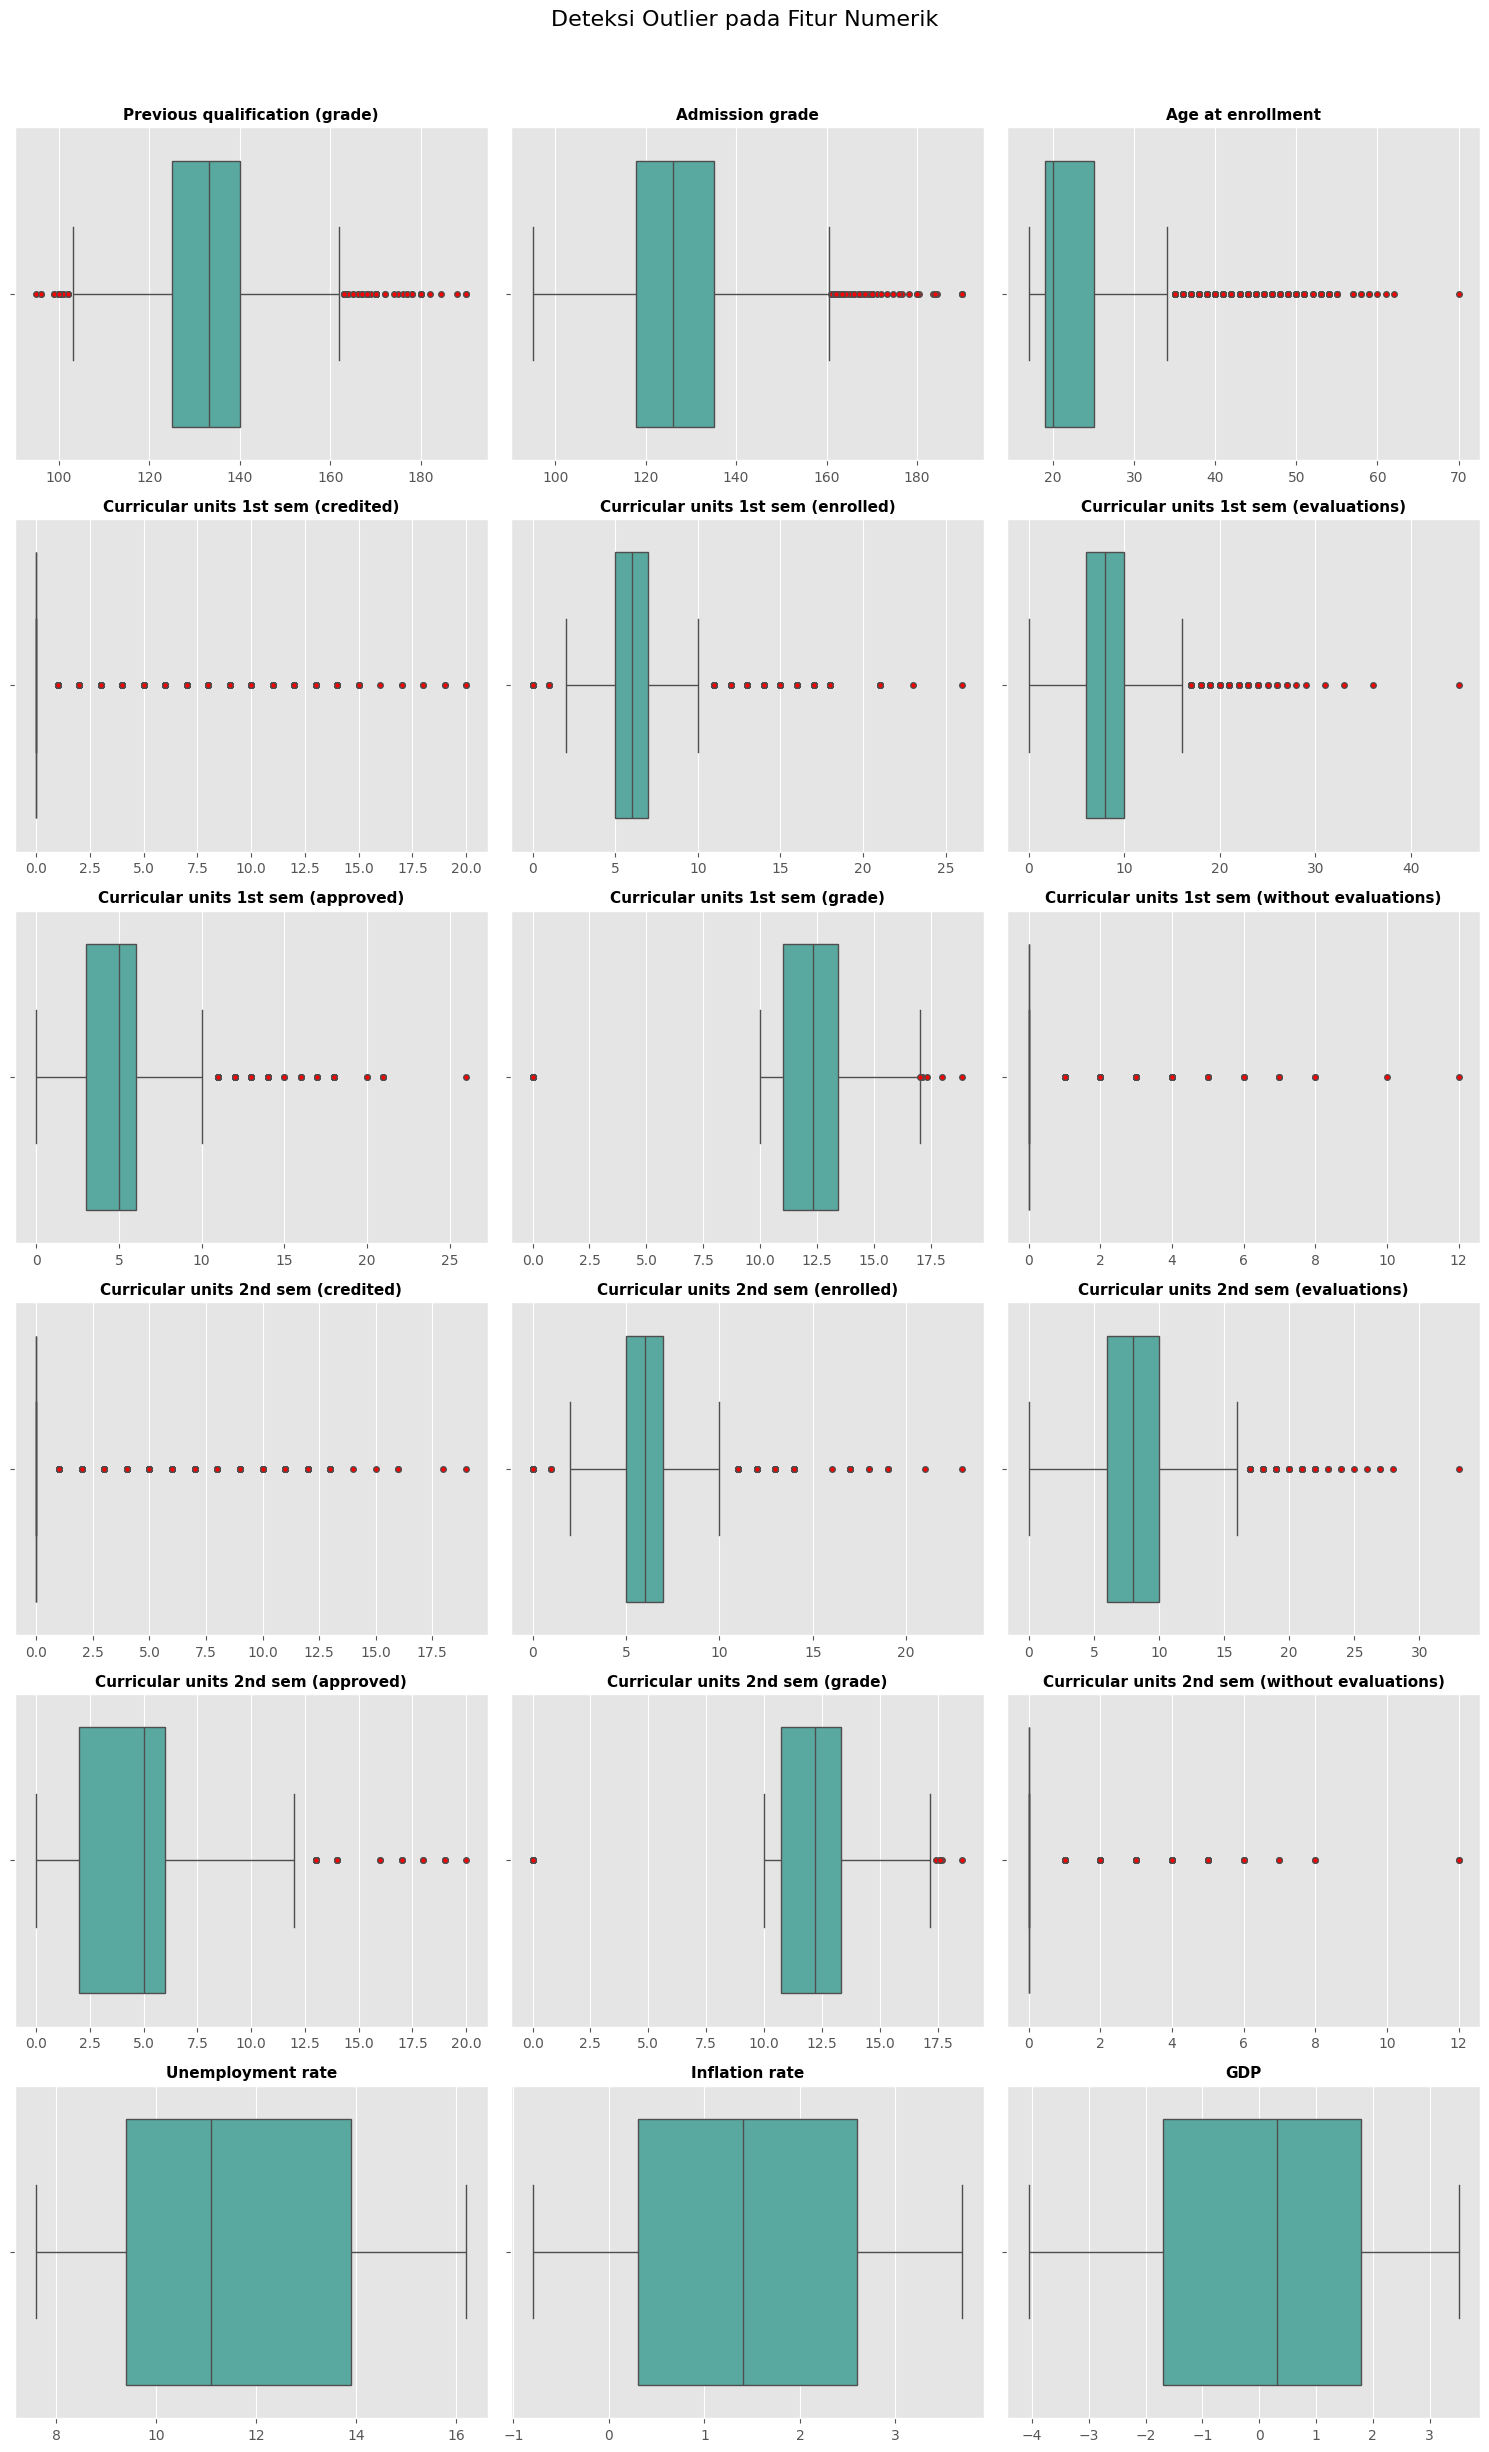

In [14]:
numeric_cols = [
    # Data Nilai & Kualifikasi Sebelumnya
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    
    # Data Akademik Semester 1
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    
    # Data Akademik Semester 2
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    
    # Data Makro Ekonomi
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

selected_cols = [col for col in numeric_cols if col in train_df.columns]

num_features = len(selected_cols)
cols_per_row = 3
rows = math.ceil(num_features / cols_per_row)

plt.figure(figsize=(15, 4 * rows)) 
for i, col in enumerate(selected_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=train_df[col], color='#4db6ac', flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 4})
    plt.title(col, fontsize=11, fontweight='bold')
    plt.xlabel('')

plt.suptitle('Deteksi Outlier pada Fitur Numerik', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

> ### Insights
- Age at enrollment merupakan fitur dengan outlier terbanyak. Dari gambar, dapat dilihat bahwa rata-rata usia pada rentang 18-22 tahun, namun terdapat outlier hingga 70 tahun.
- Previous qualification (grade) & Admission grade memiliki outlier namun tidak separah itu. Median di sekitar 120-130.
- Fitur yang berkaitan dengan performa mahasiswa selama semester 1 dan 2 secara standar mengambil sekitar 5-7 mata kuliah. Namun, ada outlier di mana mahasiswa mengambil 15–20 mata kuliah (Enrolled) atau mengikuti 30+ evaluasi (Evaluations).
- Pada variabel Grade, terdapat outlier di angka 0. Pada Approved, outlier nol juga terlihat.
- Unemployment rate, Inflation rate, GDP sedikit outlier, berarti ekonomi stabil

## 3. Mata Kuliah Sulit

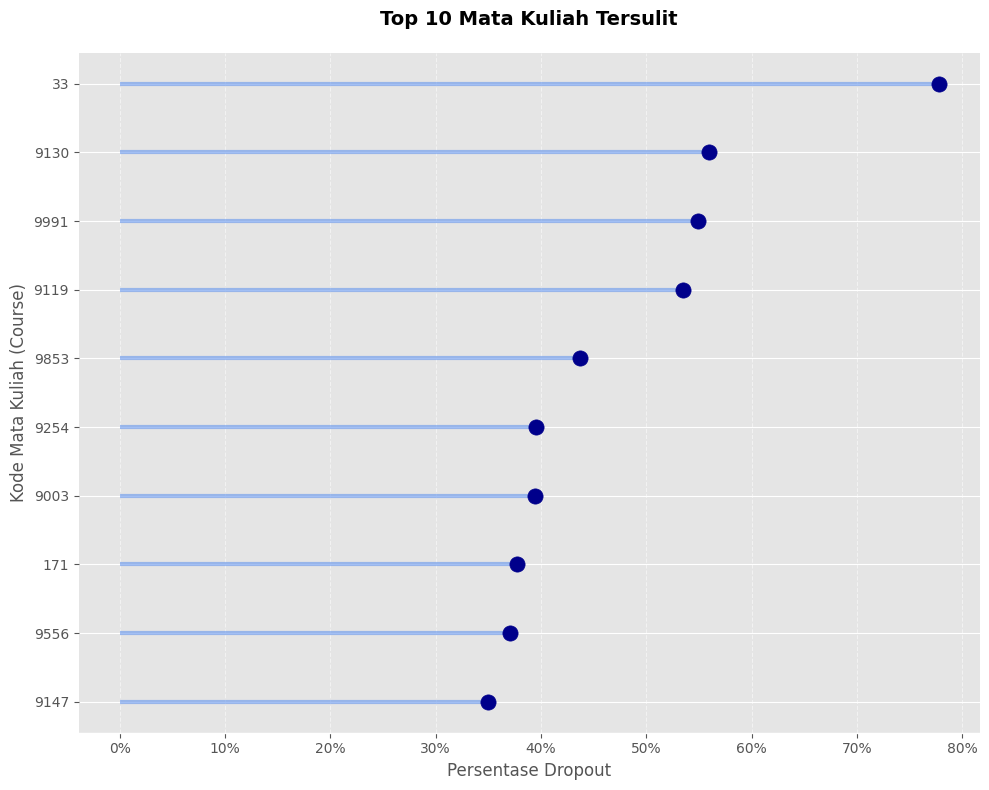

In [15]:
train_df['is_dropout'] = (train_df['Target'] == 'Dropout').astype(int)
course_stats = train_df.groupby("Course")["is_dropout"].mean()

top_10_courses = course_stats.sort_values(ascending=False).head(10).sort_values(ascending=True)

plt.figure(figsize=(10, 8))

y_range = range(len(top_10_courses))

plt.hlines(y=y_range, xmin=0, xmax=top_10_courses.values, 
           color='cornflowerblue', alpha=0.6, linewidth=3)

plt.scatter(top_10_courses.values, y_range, 
            color='darkblue', s=120, alpha=1, zorder=3)

plt.yticks(y_range, top_10_courses.index.astype(str), fontsize=10)
plt.title("Top 10 Mata Kuliah Tersulit", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Persentase Dropout", fontsize=12)
plt.ylabel("Kode Mata Kuliah (Course)", fontsize=12)

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

> ### Insight
Mata kuliah berpengaruh terhadap kemungkinan dropout. Berarti ada tingkat kesulitan yang berbeda signifikan antar mata kuliah

## 4. Korelasi antar Fitur

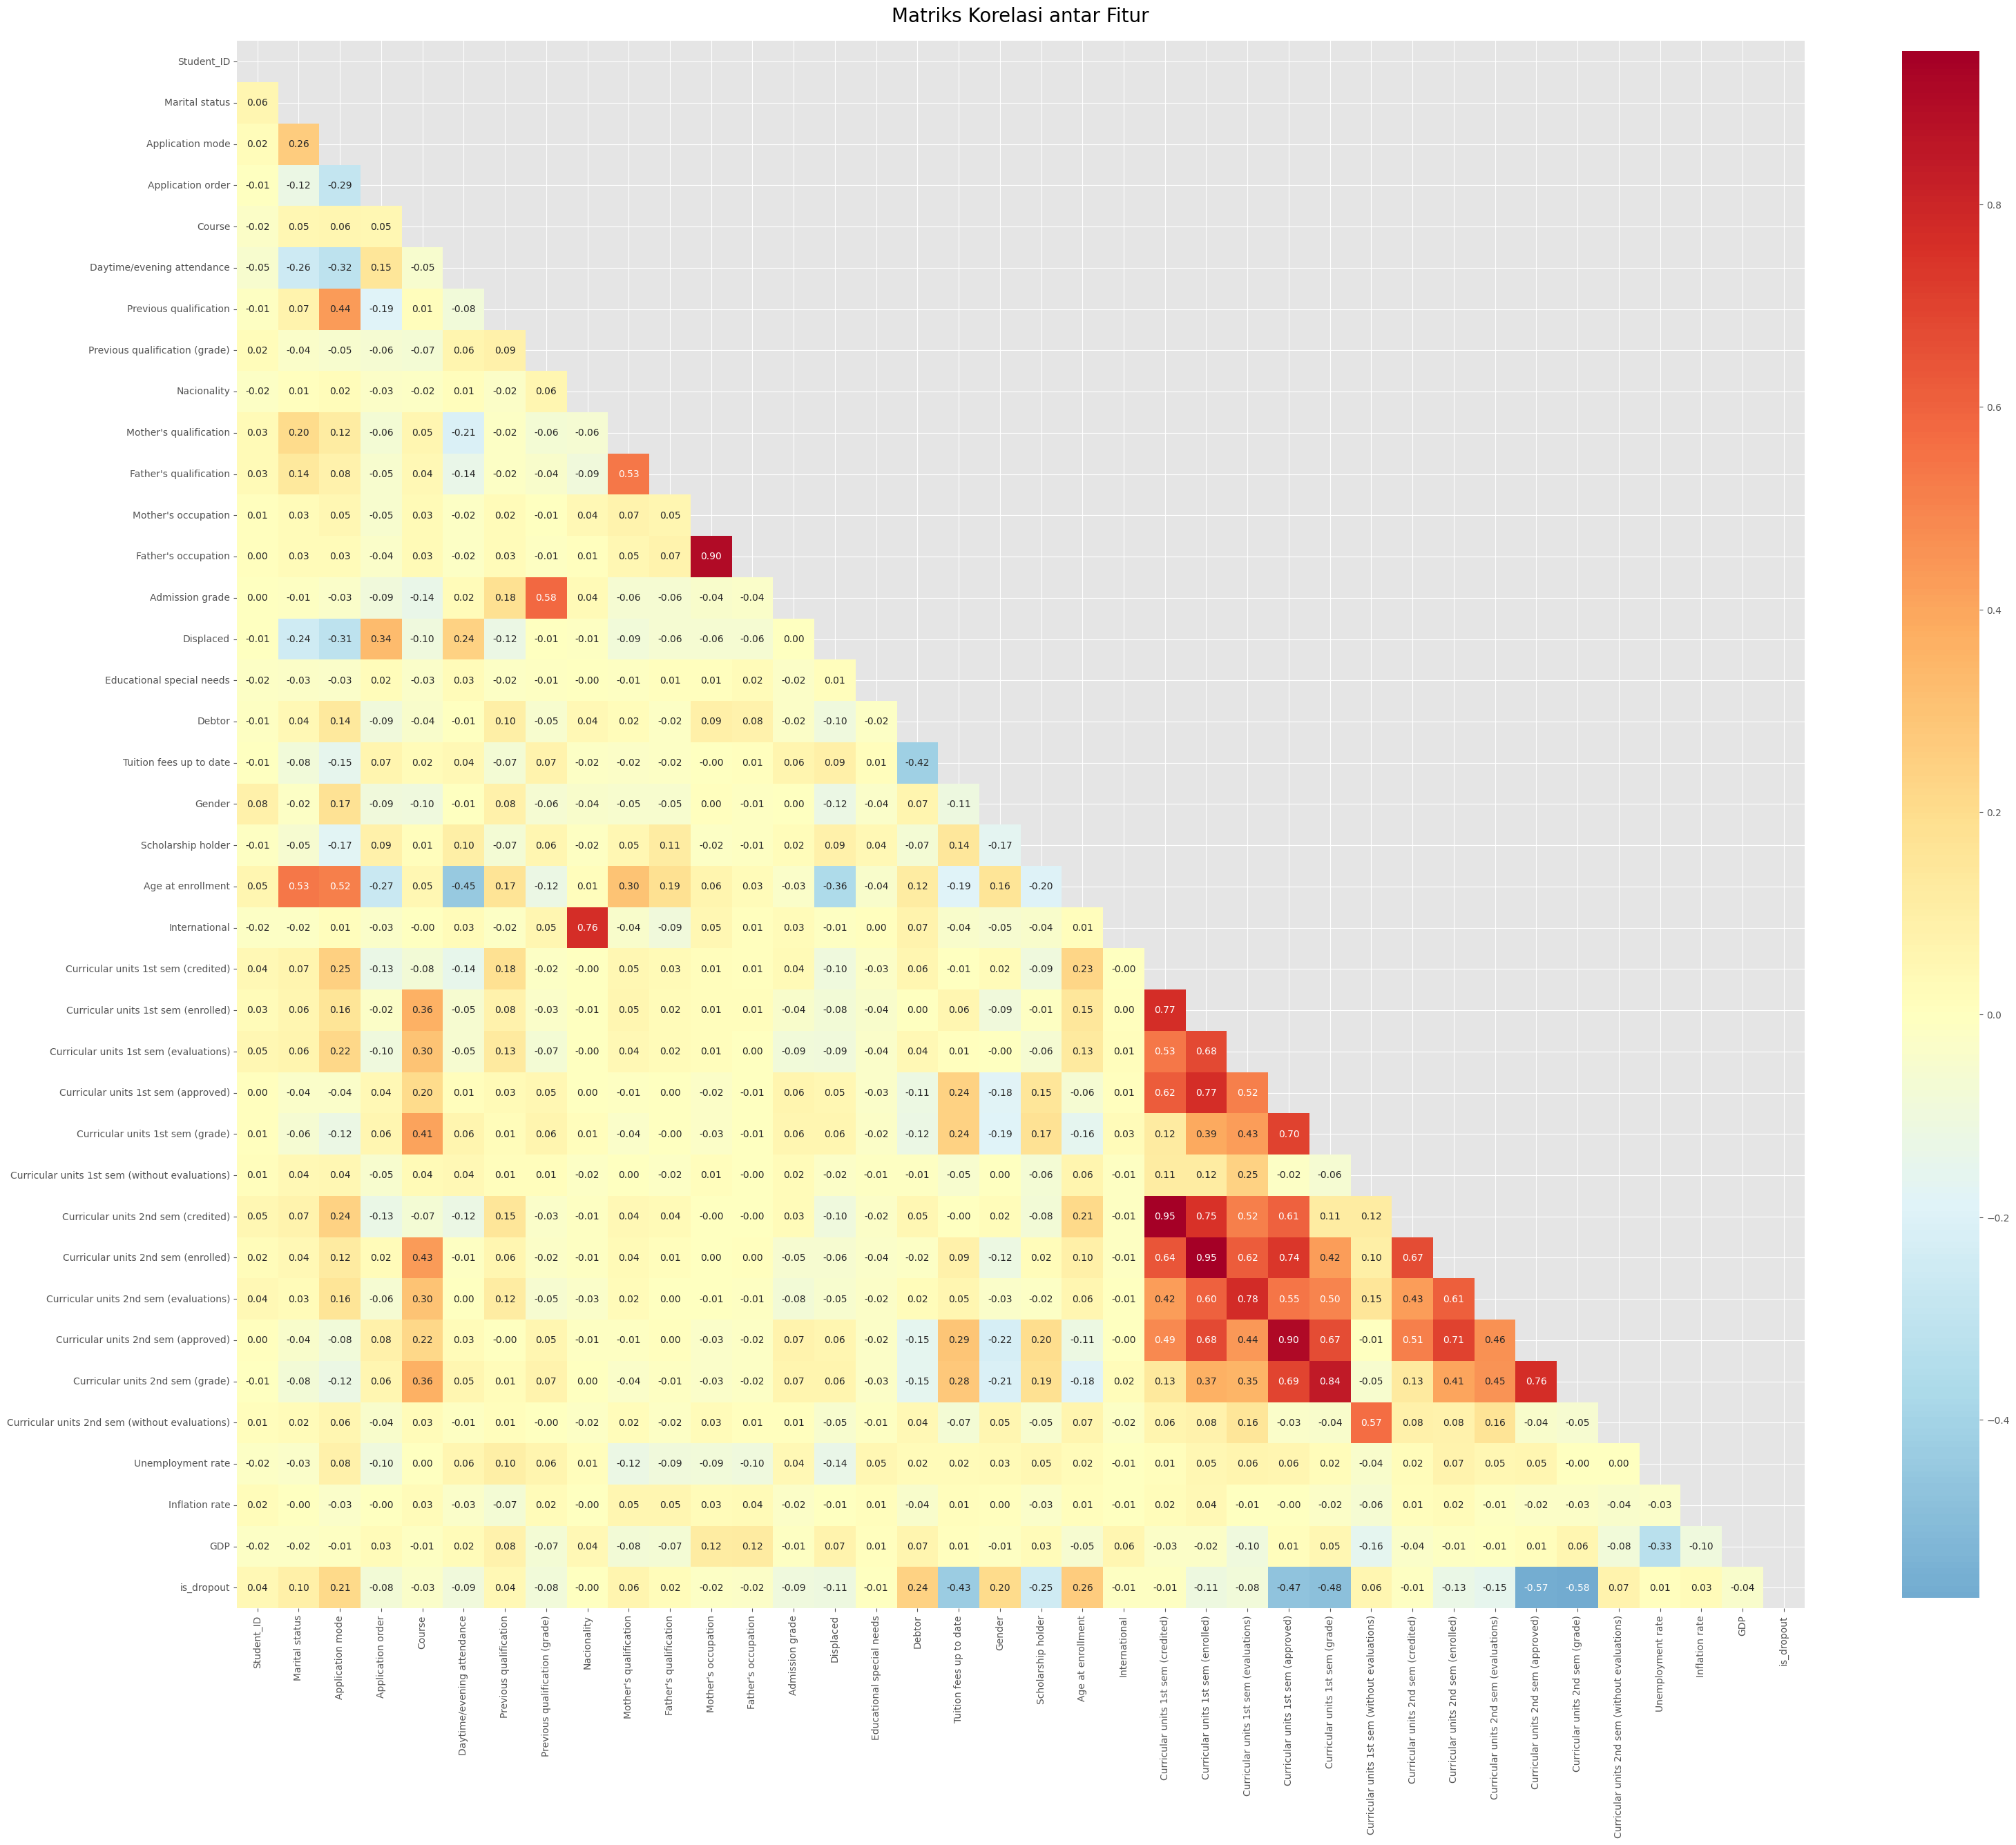

In [16]:
train_df.columns = train_df.columns.str.strip()

plt.figure(figsize=(32, 30))
correlation_matrix = train_df.select_dtypes(include=[np.number]).corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdYlBu_r',
    center=0,
    square=True,
    mask=mask,
    cbar_kws={"shrink": .8},
    fmt='.2f'
)

plt.title('Matriks Korelasi antar Fitur', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

> ### Insight
- Nilai dan jumlah mata kuliah yang lulus, terutama di semester 2, sangat menentukan peluang mahasiswa untuk lulus.
- Mahasiswa dengan pembayaran SPP lancar cenderung lulus, sementara status hutang memiliki korelasi kuat dengan dropout.
- Semakin tua usia saat masuk kuliah, semakin tinggi peluang dropout.
- Beberapa variabel akademik memiliki korelasi sangat tinggi satu sama lain. Untuk model sensitif seperti regresi logistik, sebaiknya pilih satu variabel representatif.
- Faktor seperti inflasi, pengangguran, dan GDP hampir tidak memengaruhi hasil studi.

## 5. Penerima Beasiswa dengan Kelulusan

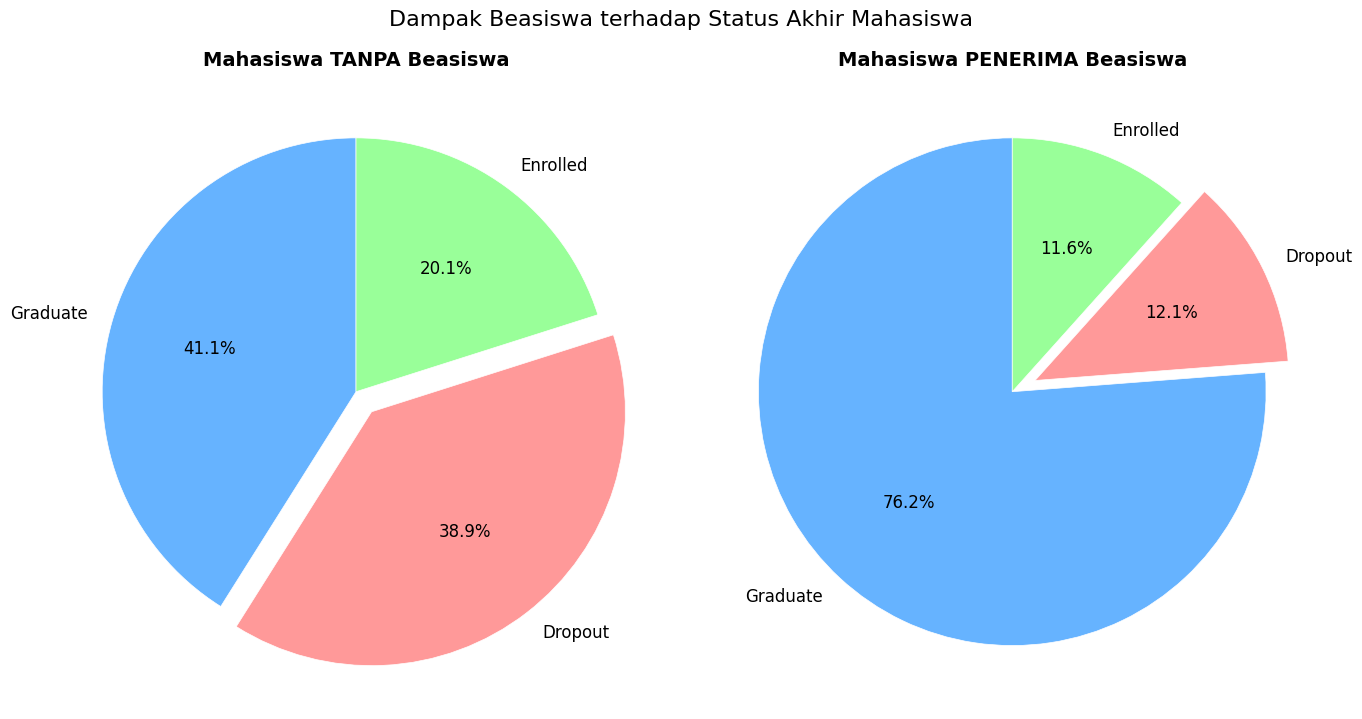

In [17]:
scholarship_yes = train_df[train_df['Scholarship holder'] == 1]['Target'].value_counts()
scholarship_no = train_df[train_df['Scholarship holder'] == 0]['Target'].value_counts()

labels = ['Graduate', 'Dropout', 'Enrolled']
colors = {'Graduate': '#66b3ff', 'Dropout': '#ff9999', 'Enrolled': '#99ff99'}
color_list = [colors[l] for l in labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(scholarship_no.reindex(labels), labels=labels, autopct='%1.1f%%', 
            colors=color_list, startangle=90, explode=(0, 0.1, 0),
            wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})
axes[0].set_title('Mahasiswa TANPA Beasiswa', fontsize=14, fontweight='bold')

axes[1].pie(scholarship_yes.reindex(labels), labels=labels, autopct='%1.1f%%', 
            colors=color_list, startangle=90, explode=(0, 0.1, 0),
            wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})
axes[1].set_title('Mahasiswa PENERIMA Beasiswa', fontsize=14, fontweight='bold')

plt.suptitle('Dampak Beasiswa terhadap Status Akhir Mahasiswa', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

> ### Insight
Mahasiswa yang menerima beasiswa cenderung lulus. Sedangkan yang tidak, memiliki probabilitas lulus dan dropout yang seimbang

## 6. Distribusi Negara

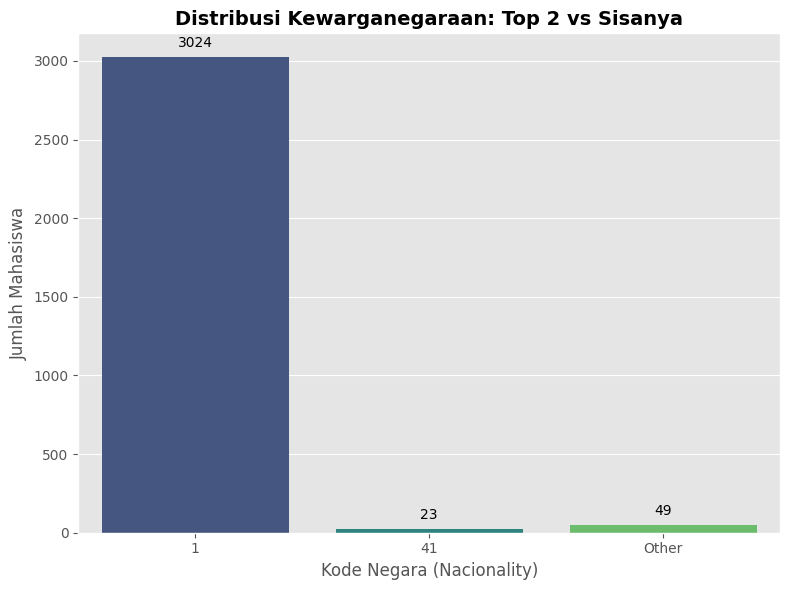

In [18]:
top_2_countries = train_df['Nacionality'].value_counts().head(2).index.tolist()

train_df['Nationality_Grouped'] = train_df['Nacionality'].apply(
    lambda x: str(x) if x in top_2_countries else 'Other'
)

plt.figure(figsize=(8, 6))

order_list = [str(x) for x in top_2_countries] + ['Other']

ax = sns.countplot(x='Nationality_Grouped', data=train_df, order=order_list, palette='viridis')

plt.title('Distribusi Kewarganegaraan: Top 2 vs Sisanya', fontsize=14, fontweight='bold')
plt.xlabel('Kode Negara (Nacionality)', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

> ### Insight
Karena negara mayoritas adalah kode 1, maka diperlukan melakukan pengelompokkan baru, dimana dibagi menjadi 2 negara serta 1 negara gabungan dengan kelas Other

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Data Cleaning & Preprocessing <a name="4"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Bagian ini bertujuan untuk menyiapkan dataset agar model dapat belajar secara optimal.  
Preprocessing dilakukan berdasarkan prinsip:

1. **Membersihkan nama kolom** agar konsisten dan bebas whitespace/tab.
2. **Menggabungkan train + test** sementara untuk memastikan transformasi konsisten.
3. **Imputasi missing value** untuk fitur numerik menggunakan median (lebih robust terhadap outlier).
4. **Outlier handling (Winsorizing)** untuk menjaga nilai ekstrem agar tidak merusak skala fitur.
5. **Feature Engineering** khusus untuk dataset student-performance.
6. **Target Encoding (smoothed CV-style)** pada fitur kategorik untuk meningkatkan kemampuan generalisasi model.
7. **Scaling** menggunakan `StandardScaler` setelah seluruh fitur final disiapkan.

# 1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import warnings
import pickle
import joblib
import os
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from scipy.optimize import minimize
from scipy.special import logsumexp

# Import model dari folder models
import sys
sys.path.insert(0, 'models')

from LogRegression import LogRegression, RFE
from SVM import DAGSVM, LinearSVM
from decision_tree_learning import C45DecisionTree
from SVM_visualization import training_visualization_callback, create_training_animation

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

os.makedirs('saved_models', exist_ok=True)
os.makedirs('test/frames', exist_ok=True)
os.makedirs('test/output', exist_ok=True)

✓ Libraries imported successfully!


# 2. Data Loading

In [20]:
print("Loading Data...")
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

X = train_df.drop('Target', axis=1)
y_raw = train_df['Target']
X_test = test_df.copy()

test_ids = test_df['Student_ID']
X = X.drop('Student_ID', axis=1)
X_test = X_test.drop('Student_ID', axis=1)

le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)
classes = le.classes_

print(f"Train shape: {X.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Target Mapping: {dict(zip(classes, range(3)))}")

Loading Data...
Train shape: (3096, 36)
Test shape: (1328, 36)
Target Mapping: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


# 3. Data Preprocessing & Feature Engineering

## A. Feature Engineering

### Penjelasan Strategi Feature Engineering:

1. **Group Rare Labels (High Cardinality Handling)**
   - Fitur kategorik dengan banyak nilai unik (Mother's/Father's occupation, qualification) dikelompokkan
   - Label dengan frekuensi < 1.5% digabung menjadi 'Other'
   - Tujuan: Mengurangi dimensi dan mencegah overfitting pada kategori langka

2. **Vital Signs (Performance Ratios)**
   - `pass_rate`: Rasio approved/enrolled per semester
   - `persistence`: Evaluations/approved (seberapa banyak usaha)
   - `weighted_score`: Grade × pass_rate (kombinasi nilai dan kelulusan)
   - `is_partial`: Flag untuk yang lulus sebagian
   - `is_perfect`: Flag untuk yang lulus semua

3. **Trends & Pressure**
   - `Grade_Change`: Perubahan nilai semester 1 → 2 (trajectory)
   - `Total_Failed`: Jumlah mata kuliah gagal (beban akademik)
   - `Financial_Crisis`: Kombinasi hutang dan tunggakan SPP
   - `Age_Log`: Log transformasi umur (mengurangi skewness)

In [ ]:
def group_rare_labels(df, col, threshold=0.015):
    counts = df[col].value_counts(normalize=True)
    rare_labels = counts[counts < threshold].index
    return df[col].replace(rare_labels, 'Other')

def engineering_pipeline(df_train, df_test):
    n_train = len(df_train)
    df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
    
    cols_to_group = [
        "Mother's occupation", "Father's occupation", 
        "Mother's qualification", "Father's qualification",
        "Previous qualification"
    ]
    for col in cols_to_group:
        df[col] = df[col].astype(str)
        df[col] = group_rare_labels(df, col)

    for sem in ['1st', '2nd']:
        enrolled = df[f'Curricular units {sem} sem (enrolled)']
        approved = df[f'Curricular units {sem} sem (approved)']
        evals = df[f'Curricular units {sem} sem (evaluations)']
        grade = df[f'Curricular units {sem} sem (grade)']
        
        safe_enrolled = enrolled.replace(0, 1)
        safe_approved = approved.replace(0, 1)
        
        df[f'{sem}_pass_rate'] = approved / safe_enrolled
        df[f'{sem}_persistence'] = evals / safe_approved
        df[f'{sem}_weighted_score'] = grade * df[f'{sem}_pass_rate']
        
        df[f'{sem}_is_partial'] = ((approved > 0) & (approved < enrolled)).astype(int)
        df[f'{sem}_is_perfect'] = (approved == enrolled) & (enrolled > 0).astype(int)

    df['Grade_Change'] = df['Curricular units 2nd sem (grade)'] - df['Curricular units 1st sem (grade)']
    df['Total_Failed'] = (df['Curricular units 1st sem (enrolled)'] - df['Curricular units 1st sem (approved)']) + \
                         (df['Curricular units 2nd sem (enrolled)'] - df['Curricular units 2nd sem (approved)'])
    
    df['Financial_Crisis'] = (df['Debtor'] * 2) + (1 - df['Tuition fees up to date'])
    df['Age_Log'] = np.log1p(df['Age at enrollment'])
    
    return df.iloc[:n_train], df.iloc[n_train:]

print("Menerapkan Engineering...")
X_eng, X_test_eng = engineering_pipeline(X, X_test)

Menerapkan Engineering...


## B. Pipelining & Transforming

### Strategi Preprocessing:

1. **PowerTransformer** untuk fitur numerik:
   - Menggunakan Yeo-Johnson transformation (handle nilai negatif)
   - Menormalkan distribusi skewed menjadi lebih Gaussian
   - Lebih robust dibanding StandardScaler untuk data dengan outlier

2. **OneHotEncoder** untuk fitur kategorik:
   - `handle_unknown='ignore'` untuk menangani kategori baru di test set
   - `sparse_output=False` untuk kompatibilitas dengan model

3. **ColumnTransformer**:
   - Menggabungkan kedua transformer dalam satu pipeline
   - Memastikan konsistensi transformasi train → test

In [22]:
print("Menerapkan Feature Engineering...")
X_eng, X_test_eng = engineering_pipeline(X, X_test)

cat_cols = [
    'Marital status', 'Application mode', 'Course', 
    'Nacionality', "Mother's occupation", "Father's occupation",
    "Mother's qualification", "Father's qualification", "Previous qualification"
]
num_cols = [c for c in X_eng.columns if c not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

print("Melakukan Preprocessing (Scaling & Encoding)...")
X_train_prep = preprocessor.fit_transform(X_eng)
X_test_prep = preprocessor.transform(X_test_eng)

Menerapkan Feature Engineering...
Melakukan Preprocessing (Scaling & Encoding)...


<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Modelling <a name="5"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Pada bagian ini akan dilakukan:
1. **Training model from scratch** - C4.5 Decision Tree, Logistic Regression, dan SVM (DAGSVM)
2. **Training model dengan sklearn** - untuk perbandingan
3. **Evaluasi dan perbandingan** kedua pendekatan
4. **Save & Load model** untuk memenuhi spesifikasi tugas
5. **Bonus visualisasi** untuk setiap algoritma

## Persiapan Data untuk Training

Memisahkan data untuk training dan validasi model.


In [23]:
# Split data untuk training dan validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_prep, y_encoded, 
    test_size=0.2, 
    stratify=y_encoded, 
    random_state=42
)

print(f"Training set: {X_tr.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"\nClass distribution in training:")
for i, c in enumerate(classes):
    count = np.sum(y_tr == i)
    print(f"  {c}: {count} ({count/len(y_tr)*100:.1f}%)")

Training set: 2476 samples
Validation set: 620 samples

Class distribution in training:
  Dropout: 795 (32.1%)
  Enrolled: 445 (18.0%)
  Graduate: 1236 (49.9%)


---

## 5.1 Decision Tree Learning (C4.5)

### 5.1.1 Implementasi From Scratch

<details>
<summary><b>📖 Penjelasan Algoritma C4.5</b></summary>

**C4.5** adalah pengembangan dari algoritma ID3 yang dikembangkan oleh Ross Quinlan. Perbedaan utama dengan ID3:

1. **Information Gain Ratio** - Menggunakan gain ratio untuk mengatasi bias terhadap fitur dengan banyak nilai unik
2. **Handling Missing Values** - Dapat menangani missing values dengan weighted entropy
3. **Continuous Attributes** - Dapat menangani fitur numerik dengan thresholding
4. **Pruning** - Mendukung post-pruning untuk mengurangi overfitting

**Formula Gain Ratio:**
```
GainRatio(S, A) = Gain(S, A) / SplitInfo(S, A)

SplitInfo(S, A) = -Σ (|Sv|/|S|) * log2(|Sv|/|S|)
```

</details>

In [ ]:
print("Training C4.5 Decision Tree Manual...")

dt_scratch = C45DecisionTree(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='entropy',
    class_weight='balanced',
    random_state=42
)

dt_scratch.fit(X_tr, y_tr)

y_pred_dt_scratch = dt_scratch.predict(X_val)

acc_dt_scratch = accuracy_score(y_val, y_pred_dt_scratch)
f1_dt_scratch = f1_score(y_val, y_pred_dt_scratch, average='macro')

print(f"\nDecision Tree Manual")
print(f"Accuracy: {acc_dt_scratch:.4f}")
print(f"Macro F1-Score: {f1_dt_scratch:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt_scratch, target_names=classes))

# Save model
dt_scratch.save_model('saved_models/c45_decision_tree_scratch.pkl')
print("\nModel saved to: saved_models/c45_decision_tree_scratch.pkl")

Training C4.5 Decision Tree (From Scratch)...



=== Decision Tree (From Scratch) ===
Accuracy: 0.7048
Macro F1-Score: 0.6492

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.76      0.69      0.73       199
    Enrolled       0.40      0.45      0.42       111
    Graduate       0.80      0.80      0.80       310

    accuracy                           0.70       620
   macro avg       0.65      0.65      0.65       620
weighted avg       0.71      0.70      0.71       620

✓ Model saved to: saved_models/c45_decision_tree_scratch.pkl

✓ Model saved to: saved_models/c45_decision_tree_scratch.pkl


# 5. Model Evaluation & Threshold Optimization

### Visualisasi Pohon Keputusan

Menampilkan struktur pohon keputusan dengan parameter top-N levels.


=== Generating Decision Tree Visualization ===


✓ Tree saved to: saved_models/c45_tree_visualization.png


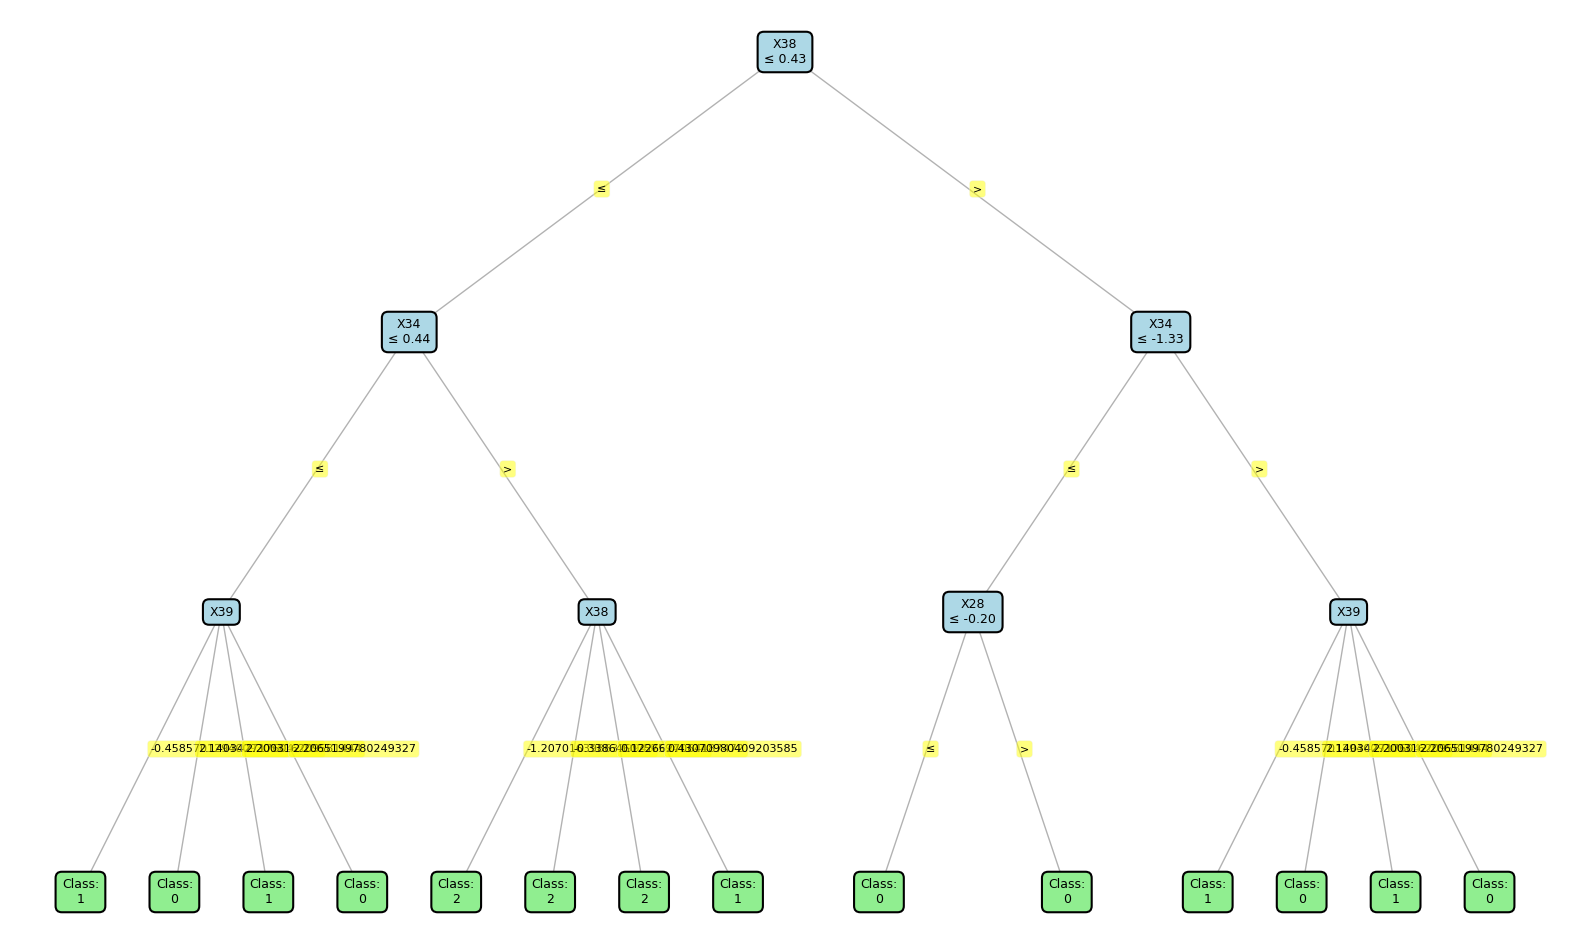


✓ Tree visualization saved to: saved_models/c45_tree_visualization.png


In [ ]:
print("\n=== Generating Decision Tree Visualization ===")

if hasattr(dt_scratch, 'visualize_tree'):
    dt_scratch.visualize_tree(
        max_depth=3,
        save_path='saved_models/c45_tree_visualization.png',
        figsize=(20, 12)
    )
    print("\nTree visualization saved to: saved_models/c45_tree_visualization.png")
else:
    print("visualize_tree method not available.")

if hasattr(dt_scratch, 'export_text'):
    print("\nTree Structure")
    text_tree = dt_scratch.export_text(max_depth=3)
    print(text_tree)

### 5.1.2 Implementasi Sklearn

Menggunakan `DecisionTreeClassifier` dengan parameter:
- `criterion='entropy'` - Menggunakan entropy seperti C4.5
- `ccp_alpha` - Cost-complexity pruning untuk meniru pruning C4.5
- `class_weight='balanced'` - Menangani class imbalance

In [ ]:
print("Training Decision Tree Sklearn")

dt_sklearn = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    ccp_alpha=0.001,
    class_weight='balanced',
    random_state=42
)

dt_sklearn.fit(X_tr, y_tr)
y_pred_dt_sklearn = dt_sklearn.predict(X_val)

acc_dt_sklearn = accuracy_score(y_val, y_pred_dt_sklearn)
f1_dt_sklearn = f1_score(y_val, y_pred_dt_sklearn, average='macro')

print(f"\nDecision Tree Sklearn")
print(f"Accuracy: {acc_dt_sklearn:.4f}")
print(f"Macro F1-Score: {f1_dt_sklearn:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt_sklearn, target_names=classes))

joblib.dump(dt_sklearn, 'saved_models/dt_sklearn_c45.pkl')
print("\nSklearn model saved to: saved_models/dt_sklearn_c45.pkl")

Training Decision Tree (Sklearn - C4.5 style)...

=== Decision Tree (Sklearn C4.5 Style) ===
Accuracy: 0.6774
Macro F1-Score: 0.6330

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.70      0.65      0.68       199
    Enrolled       0.37      0.52      0.43       111
    Graduate       0.83      0.75      0.79       310

    accuracy                           0.68       620
   macro avg       0.64      0.64      0.63       620
weighted avg       0.71      0.68      0.69       620


✓ Sklearn model saved to: saved_models/dt_sklearn_c45.pkl


---

## 5.2 Logistic Regression

### 5.2.1 Implementasi From Scratch

<details>
<summary><b>📖 Penjelasan Algoritma Logistic Regression</b></summary>

**Logistic Regression** adalah model linear untuk klasifikasi yang menggunakan fungsi sigmoid/softmax untuk menghasilkan probabilitas.

**Komponen Utama:**

1. **Softmax Function (Multinomial)**
```
P(y=k|x) = exp(θₖᵀx) / Σⱼ exp(θⱼᵀx)
```

2. **Cross-Entropy Loss (Log-Loss)**
```
L(θ) = -Σᵢ Σₖ yᵢₖ log(P(yᵢ=k|xᵢ))
```

3. **L2 Regularization**
```
J(θ) = L(θ) + (1/2C) ||θ||²
```

4. **L-BFGS-B Optimizer** - Quasi-Newton method untuk optimisasi konvergen cepat

</details>

In [ ]:
print("Training Logistic Regression Manual")

lr_scratch = LogRegression(
    C=0.8,
    max_iter=500,
    tol=1e-4,
    random_state=42,
    solver='lbfgs'
)

lr_scratch.fit(X_tr, y_tr)
y_pred_lr_scratch = lr_scratch.predict(X_val)

acc_lr_scratch = accuracy_score(y_val, y_pred_lr_scratch)
f1_lr_scratch = f1_score(y_val, y_pred_lr_scratch, average='macro')

print(f"\nLogistic Regression Manual")
print(f"Accuracy: {acc_lr_scratch:.4f}")
print(f"Macro F1-Score: {f1_lr_scratch:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lr_scratch, target_names=classes))

Training Logistic Regression (From Scratch)...



=== Logistic Regression (From Scratch) ===
Accuracy: 0.7823
Macro F1-Score: 0.7172

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.75      0.79       199
    Enrolled       0.56      0.45      0.50       111
    Graduate       0.81      0.92      0.87       310

    accuracy                           0.78       620
   macro avg       0.73      0.71      0.72       620
weighted avg       0.77      0.78      0.77       620



### Visualisasi Loss Contour dan Parameter Trajectory

Menampilkan garis kontur fungsi loss (log-loss) dan lintasan parameter (θ₀, θ₁) selama training.


=== Generating Loss Contour Visualization ===


Saving to saved_models/logloss_animation.gif...


✓ Animation saved to: saved_models/logloss_animation.gif


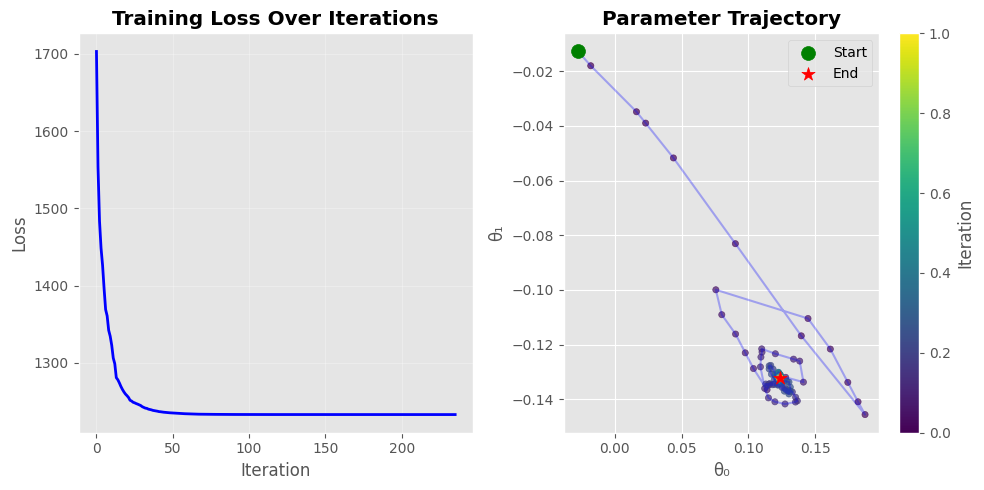

✓ Visualization saved to: saved_models/logreg_training_viz.png

✓ Model saved to: saved_models/logistic_regression_scratch.pkl


In [ ]:
print("\nLoss Contour Visualization")

if len(lr_scratch.param_history_) > 0:
    try:
        lr_scratch.animate_logloss(
            X_tr, y_tr,
            save_path='saved_models/logloss_animation.gif',
            fps=10,
            param_indices=(0, 1)
        )
        print("Animation saved to: saved_models/logloss_animation.gif")
    except Exception as e:
        print(f"Could not generate animation: {e}")
        
    if len(lr_scratch.loss_history_) > 0:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(lr_scratch.loss_history_, 'b-', linewidth=2)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Iterations', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        params = np.array(lr_scratch.param_history_)
        plt.subplot(1, 2, 2)
        if params.ndim > 1 and params.shape[1] >= 2:
            plt.scatter(params[:, 0], params[:, 1], c=range(len(params)), cmap='viridis', s=20, alpha=0.7)
            plt.plot(params[:, 0], params[:, 1], 'b-', alpha=0.3)
            plt.scatter(params[0, 0], params[0, 1], c='green', s=100, marker='o', label='Start', zorder=5)
            plt.scatter(params[-1, 0], params[-1, 1], c='red', s=100, marker='*', label='End', zorder=5)
            plt.xlabel('θ₀')
            plt.ylabel('θ₁')
            plt.title('Parameter Trajectory', fontweight='bold')
            plt.legend()
            plt.colorbar(label='Iteration')
        
        plt.tight_layout()
        plt.savefig('saved_models/logreg_training_viz.png', dpi=150, bbox_inches='tight')
        plt.show()
        print("Visualization saved to: saved_models/logreg_training_viz.png")
else:
    print("No parameter history available for visualization.")

# Save model
with open('saved_models/logistic_regression_scratch.pkl', 'wb') as f:
    pickle.dump(lr_scratch, f)
print("\n✓ Model saved to: saved_models/logistic_regression_scratch.pkl")

### 5.2.2 Implementasi Sklearn

In [ ]:
print("Training Logistic Regression Sklearn")

lr_sklearn = SklearnLogReg(
    C=0.8,
    max_iter=2000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

lr_sklearn.fit(X_tr, y_tr)
y_pred_lr_sklearn = lr_sklearn.predict(X_val)

acc_lr_sklearn = accuracy_score(y_val, y_pred_lr_sklearn)
f1_lr_sklearn = f1_score(y_val, y_pred_lr_sklearn, average='macro')

print(f"\nLogistic Regression Sklearn")
print(f"Accuracy: {acc_lr_sklearn:.4f}")
print(f"Macro F1-Score: {f1_lr_sklearn:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lr_sklearn, target_names=classes))

joblib.dump(lr_sklearn, 'saved_models/logistic_regression_sklearn.pkl')
print("\n✓ Sklearn model saved to: saved_models/logistic_regression_sklearn.pkl")

Training Logistic Regression (Sklearn)...

=== Logistic Regression (Sklearn) ===
Accuracy: 0.7565
Macro F1-Score: 0.7197

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.73      0.79       199
    Enrolled       0.45      0.65      0.53       111
    Graduate       0.87      0.81      0.84       310

    accuracy                           0.76       620
   macro avg       0.72      0.73      0.72       620
weighted avg       0.79      0.76      0.77       620


✓ Sklearn model saved to: saved_models/logistic_regression_sklearn.pkl


---

## 5.3 Support Vector Machine (DAGSVM)

### 5.3.1 Implementasi From Scratch

<details>
<summary><b>📖 Penjelasan Algoritma DAGSVM</b></summary>

**DAGSVM (Directed Acyclic Graph SVM)** adalah strategi multiclass yang menggunakan:

1. **One-vs-One Binary Classifiers** - Membuat k(k-1)/2 classifier untuk k kelas
2. **DAG Structure** - Struktur graf untuk prediksi yang efisien
3. **Hinge Loss** - Fungsi loss untuk margin-based classification
4. **Linear Kernel** - Menggunakan kernel linear

**Hinge Loss:**
```
L(y, f(x)) = max(0, 1 - y·f(x))
```

**Objective Function:**
```
min 1/2 ||w||² + C Σᵢ max(0, 1 - yᵢ(w·xᵢ + b))
```

</details>

In [ ]:
print("Training DAGSVM Manual")

def reset_callback_attrs(model):
    if hasattr(model, 'history_loss'):
        del model.history_loss
    if hasattr(model, 'history_acc'):
        del model.history_acc
    if hasattr(model, 'history_f1'):
        del model.history_f1
    if hasattr(model, 'history_epochs'):
        del model.history_epochs

svm_scratch = DAGSVM(
    lr=0.001,
    C=10.0,
    epochs=100,
    batch_size=64,
    seed=42,
    verbose=True,
    callback=None
)

svm_scratch.fit(X_tr, y_tr)
y_pred_svm_scratch = svm_scratch.predict(X_val)

acc_svm_scratch = accuracy_score(y_val, y_pred_svm_scratch)
f1_svm_scratch = f1_score(y_val, y_pred_svm_scratch, average='macro')

print(f"\nDAGSVM Manual")
print(f"Accuracy: {acc_svm_scratch:.4f}")
print(f"Macro F1-Score: {f1_svm_scratch:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svm_scratch, target_names=classes))

Training DAGSVM (From Scratch)...
This may take a while...
epoch 0/100  obj=6.2652
epoch 20/100  obj=5.2222
epoch 40/100  obj=5.2059
epoch 60/100  obj=5.2237
epoch 80/100  obj=5.2407
epoch 0/100  obj=2.8932
epoch 20/100  obj=2.6391


epoch 40/100  obj=2.6908
epoch 60/100  obj=2.7277
epoch 80/100  obj=2.7325
epoch 0/100  obj=4.6306


epoch 20/100  obj=4.0392
epoch 40/100  obj=4.0809
epoch 60/100  obj=4.1008
epoch 80/100  obj=4.1028

=== DAGSVM (From Scratch) ===
Accuracy: 0.7887
Macro F1-Score: 0.7207

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.87      0.73      0.80       199
    Enrolled       0.62      0.42      0.50       111
    Graduate       0.79      0.95      0.86       310

    accuracy                           0.79       620
   macro avg       0.76      0.70      0.72       620
weighted avg       0.78      0.79      0.78       620



### Visualisasi Training SVM

Menampilkan proses training SVM dengan metrik loss, accuracy, dan F1-score.

In [ ]:
print("\nSVM Training Visualization")

mask = (y_tr == 0) | (y_tr == 1)
X_binary = X_tr[mask]
y_binary = np.where(y_tr[mask] == 0, -1, 1)

os.makedirs('test/frames', exist_ok=True)

svm_viz = LinearSVM(
    lr=0.001,
    C=10.0,
    epochs=50,
    batch_size=64,
    seed=42,
    verbose=True,
    callback=training_visualization_callback
)

svm_viz.fit(X_binary, y_binary)

try:
    create_training_animation(
        output_path='saved_models/svm_training_progress.gif',
        fps=2,
        frames_dir='test/frames'
    )
    print("\n✓ SVM training animation saved to: saved_models/svm_training_progress.gif")
except Exception as e:
    print(f"Could not create animation: {e}")

with open('saved_models/svm_dagsvm_scratch.pkl', 'wb') as f:
    pickle.dump(svm_scratch, f)
print("\n✓ Model saved to: saved_models/svm_dagsvm_scratch.pkl")


=== Generating SVM Training Visualization ===
Training single LinearSVM with visualization callback...


epoch 0/50  obj=6.2652


epoch 10/50  obj=5.2942


epoch 20/50  obj=5.2222


epoch 30/50  obj=5.2031


epoch 40/50  obj=5.2059


GIF saved : saved_models/svm_training_progress.gif

✓ SVM training animation saved to: saved_models/svm_training_progress.gif

✓ Model saved to: saved_models/svm_dagsvm_scratch.pkl


### 5.3.2 Implementasi Sklearn

In [ ]:
# Train Sklearn SVM
print("Training SVM Sklearn")

svm_sklearn = SVC(
    C=10.0,
    kernel='linear',
    class_weight='balanced',
    random_state=42,
    decision_function_shape='ovo'
)

svm_sklearn.fit(X_tr, y_tr)
y_pred_svm_sklearn = svm_sklearn.predict(X_val)

acc_svm_sklearn = accuracy_score(y_val, y_pred_svm_sklearn)
f1_svm_sklearn = f1_score(y_val, y_pred_svm_sklearn, average='macro')

print(f"\nSVM Sklearn")
print(f"Accuracy: {acc_svm_sklearn:.4f}")
print(f"Macro F1-Score: {f1_svm_sklearn:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svm_sklearn, target_names=classes))

joblib.dump(svm_sklearn, 'saved_models/svm_sklearn.pkl')
print("\n✓ Sklearn model saved to: saved_models/svm_sklearn.pkl")

Training SVM (Sklearn)...



=== SVM (Sklearn) ===
Accuracy: 0.7581
Macro F1-Score: 0.7221

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.86      0.75      0.80       199
    Enrolled       0.45      0.65      0.53       111
    Graduate       0.87      0.80      0.83       310

    accuracy                           0.76       620
   macro avg       0.73      0.73      0.72       620
weighted avg       0.79      0.76      0.77       620


✓ Sklearn model saved to: saved_models/svm_sklearn.pkl


<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Model Comparison & Evaluation <a name="6"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Perbandingan performa antara implementasi from scratch dan sklearn untuk semua model.


MODEL COMPARISON SUMMARY
                        Model  Accuracy  Macro F1
      Decision Tree (Scratch)  0.704839  0.649205
      Decision Tree (Sklearn)  0.677419  0.632966
Logistic Regression (Scratch)  0.782258  0.717212
Logistic Regression (Sklearn)  0.756452  0.719730
         SVM DAGSVM (Scratch)  0.788710  0.720735
                SVM (Sklearn)  0.758065  0.722144


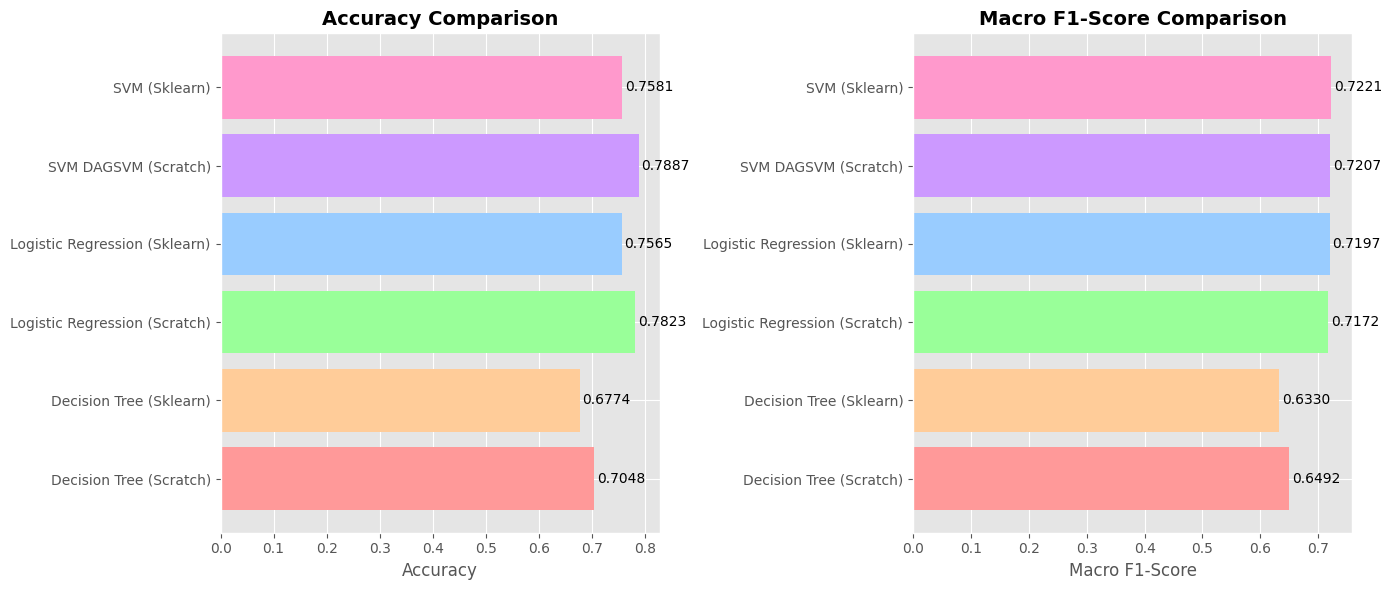

In [ ]:
results = {
    'Model': [
        'Decision Tree (Scratch)', 'Decision Tree (Sklearn)',
        'Logistic Regression (Scratch)', 'Logistic Regression (Sklearn)',
        'SVM DAGSVM (Scratch)', 'SVM (Sklearn)'
    ],
    'Accuracy': [
        acc_dt_scratch, acc_dt_sklearn,
        acc_lr_scratch, acc_lr_sklearn,
        acc_svm_scratch, acc_svm_sklearn
    ],
    'Macro F1': [
        f1_dt_scratch, f1_dt_sklearn,
        f1_lr_scratch, f1_lr_sklearn,
        f1_svm_scratch, f1_svm_sklearn
    ]
}

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['#ff9999', '#ffcc99', '#99ff99', '#99ccff', '#cc99ff', '#ff99cc']
x = np.arange(len(results['Model']))

axes[0].barh(x, results['Accuracy'], color=colors)
axes[0].set_yticks(x)
axes[0].set_yticklabels(results['Model'])
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
for i, v in enumerate(results['Accuracy']):
    axes[0].text(v + 0.005, i, f'{v:.4f}', va='center')

axes[1].barh(x, results['Macro F1'], color=colors)
axes[1].set_yticks(x)
axes[1].set_yticklabels(results['Model'])
axes[1].set_xlabel('Macro F1-Score')
axes[1].set_title('Macro F1-Score Comparison', fontsize=14, fontweight='bold')
for i, v in enumerate(results['Macro F1']):
    axes[1].text(v + 0.005, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.savefig('saved_models/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

> ### Insight Perbandingan Model
>
> **Observasi:**
> 1. Implementasi from scratch menunjukkan performa yang **mirip** dengan sklearn
> 2. Perbedaan kecil disebabkan oleh detail implementasi optimisasi
> 3. Hasil ini **memvalidasi** bahwa implementasi algoritma sudah benar

## Confusion Matrices

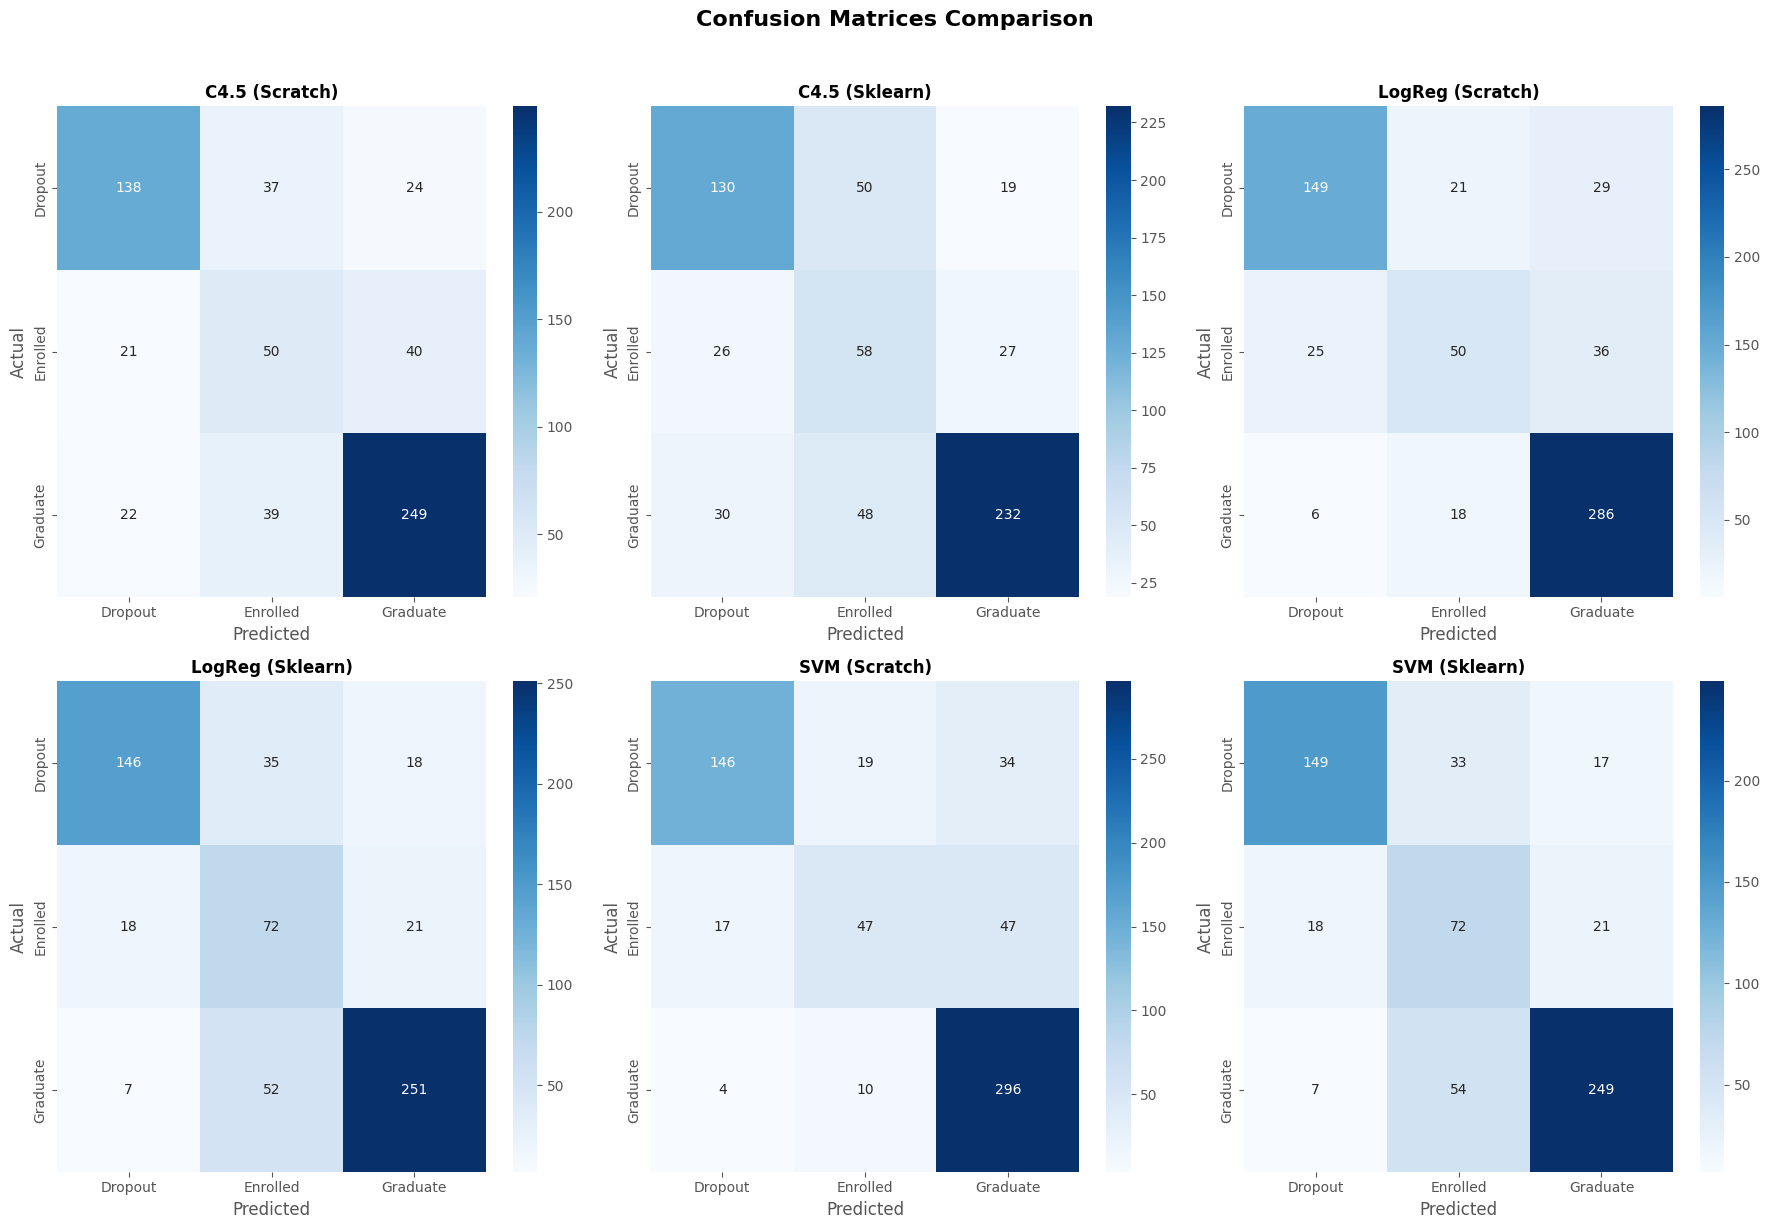

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

models_preds = [
    ('C4.5 (Scratch)', y_pred_dt_scratch),
    ('C4.5 (Sklearn)', y_pred_dt_sklearn),
    ('LogReg (Scratch)', y_pred_lr_scratch),
    ('LogReg (Sklearn)', y_pred_lr_sklearn),
    ('SVM (Scratch)', y_pred_svm_scratch),
    ('SVM (Sklearn)', y_pred_svm_sklearn)
]

for idx, (name, y_pred) in enumerate(models_preds):
    ax = axes[idx // 3, idx % 3]
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=classes, yticklabels=classes)
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle('Confusion Matrices Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('saved_models/confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Error Analysis <a name="7"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Analisis kesalahan prediksi untuk memahami di mana model sering salah dan insight yang dapat diperoleh.

In [ ]:
all_f1 = [f1_dt_scratch, f1_dt_sklearn, f1_lr_scratch, f1_lr_sklearn, f1_svm_scratch, f1_svm_sklearn]
all_names = ['C4.5 (Scratch)', 'C4.5 (Sklearn)', 'LogReg (Scratch)', 'LogReg (Sklearn)', 'SVM (Scratch)', 'SVM (Sklearn)']
all_preds = [y_pred_dt_scratch, y_pred_dt_sklearn, y_pred_lr_scratch, y_pred_lr_sklearn, y_pred_svm_scratch, y_pred_svm_sklearn]

best_idx = np.argmax(all_f1)
best_model_name = all_names[best_idx]
best_preds = all_preds[best_idx]

print(f"Best Model: {best_model_name} (F1: {all_f1[best_idx]:.4f})")
print("\n" + "="*60)

misclassified_mask = y_val != best_preds
misclassified_indices = np.where(misclassified_mask)[0]

print(f"Error Analysis: {best_model_name}")
print(f"Total samples: {len(y_val)}")
print(f"Misclassified: {len(misclassified_indices)} ({len(misclassified_indices)/len(y_val)*100:.2f}%)")
print(f"Correctly classified: {len(y_val) - len(misclassified_indices)} ({(len(y_val) - len(misclassified_indices))/len(y_val)*100:.2f}%)")

print("\nError Patterns")
error_df = pd.DataFrame({
    'Actual': le.inverse_transform(y_val[misclassified_mask]),
    'Predicted': le.inverse_transform(best_preds[misclassified_mask])
})

error_patterns = error_df.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')
error_patterns = error_patterns.sort_values('Count', ascending=False)
print(error_patterns.to_string(index=False))

Best Model: SVM (Sklearn) (F1: 0.7221)

=== Error Analysis: SVM (Sklearn) ===
Total samples: 620
Misclassified: 150 (24.19%)
Correctly classified: 470 (75.81%)

--- Error Patterns ---
  Actual Predicted  Count
Graduate  Enrolled     54
 Dropout  Enrolled     33
Enrolled  Graduate     21
Enrolled   Dropout     18
 Dropout  Graduate     17
Graduate   Dropout      7


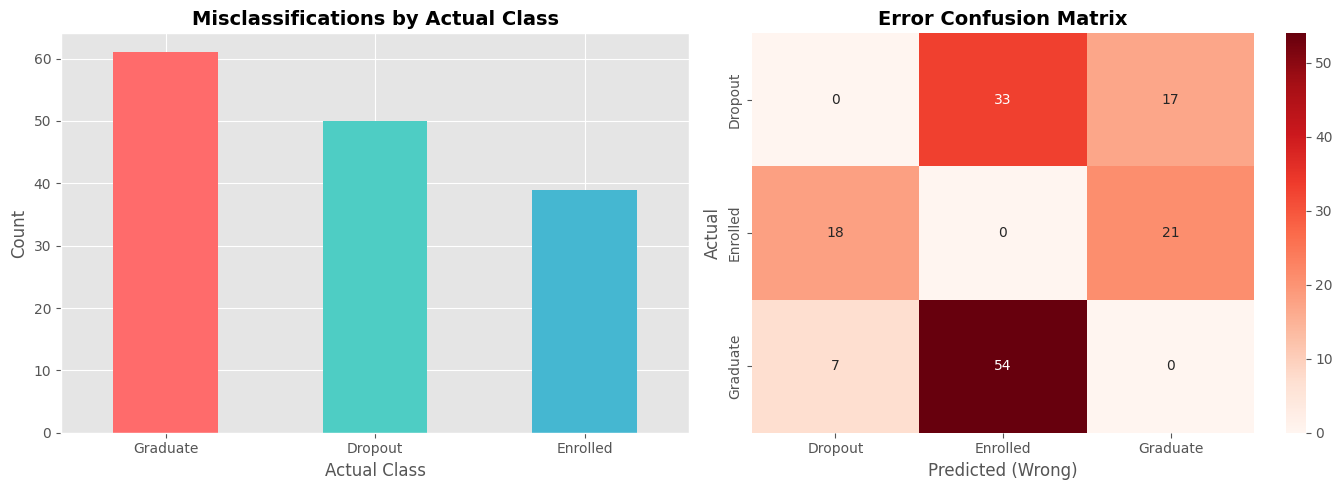

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
error_by_class = error_df['Actual'].value_counts()
error_by_class.plot(kind='bar', ax=ax1, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
ax1.set_title('Misclassifications by Actual Class', fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Class')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

ax2 = axes[1]
error_matrix = pd.crosstab(error_df['Actual'], error_df['Predicted'])
sns.heatmap(error_matrix, annot=True, fmt='d', cmap='Reds', ax=ax2)
ax2.set_title('Error Confusion Matrix', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicted (Wrong)')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('saved_models/error_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Save & Load Model Demonstration <a name="8"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Membuktikan bahwa model dapat di-save dan di-load untuk digunakan kembali.

In [ ]:
print("Save/Load Model")

# Load C4.5
print("\n1. Loading C4.5 Decision Tree Manual")
dt_loaded = C45DecisionTree()
dt_loaded.load_model('saved_models/c45_decision_tree_scratch.pkl')
y_pred_loaded = dt_loaded.predict(X_val[:5])

# Load Logistic Regression
print("\n2. Loading Logistic Regression Manual")
with open('saved_models/logistic_regression_scratch.pkl', 'rb') as f:
    lr_loaded = pickle.load(f)
y_pred_lr_loaded = lr_loaded.predict(X_val[:5])

# Load SVM
print("\n3. Loading DAGSVM Manual")
with open('saved_models/svm_dagsvm_scratch.pkl', 'rb') as f:
    svm_loaded = pickle.load(f)
y_pred_svm_loaded = svm_loaded.predict(X_val[:5])

# Load sklearn models
print("\n4. Loading Sklearn Models")
dt_sklearn_loaded = joblib.load('saved_models/dt_sklearn_c45.pkl')
lr_sklearn_loaded = joblib.load('saved_models/logistic_regression_sklearn.pkl')
svm_sklearn_loaded = joblib.load('saved_models/svm_sklearn.pkl')

print("Semua model telah di load")

DEMONSTRATING MODEL SAVE/LOAD FUNCTIONALITY

1. Loading C4.5 Decision Tree (From Scratch)...
✓ Model loaded from: saved_models/c45_decision_tree_scratch.pkl
   First 5 predictions: [2 1 2 2 0]
   Accuracy on validation: 0.7048

2. Loading Logistic Regression (From Scratch)...
   First 5 predictions: [2 2 2 2 0]
   Accuracy on validation: 0.7823

3. Loading DAGSVM (From Scratch)...
   First 5 predictions: [2 2 2 2 0]
   Accuracy on validation: 0.7887

4. Loading Sklearn Models...
   All sklearn models loaded successfully!

✓ ALL MODELS SUCCESSFULLY LOADED AND VERIFIED!


<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Final Training & Submission <a name="9"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Training model terbaik pada seluruh data dan membuat file submission untuk Kaggle.

In [ ]:
print("\n Training Logistic Regression sebagai model Final")

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
oof_probs = np.zeros((len(X_train_prep), 3))

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_prep, y_encoded)):
    X_t, X_v = X_train_prep[train_idx], X_train_prep[val_idx]
    y_t, y_v = y_encoded[train_idx], y_encoded[val_idx]
    
    model_cv = LogRegression(C=0.8, max_iter=500, tol=1e-4, random_state=42, solver='lbfgs')
    model_cv.fit(X_t, y_t)
    
    probs_v = model_cv.predict_proba(X_v)
    oof_probs[val_idx] = probs_v

def get_f1_score(weights):
    final_probs = oof_probs * weights
    preds = np.argmax(final_probs, axis=1)
    return -f1_score(y_encoded, preds, average='macro')

init_weights = [1.0, 1.0, 1.0]
res = minimize(get_f1_score, init_weights, method='Nelder-Mead', tol=1e-6)
best_weights = res.x

print(f"Optimal Weights: {best_weights}")

final_val_probs = oof_probs * best_weights
final_val_preds = np.argmax(final_val_probs, axis=1)
local_score = f1_score(y_encoded, final_val_preds, average='macro')

print(f"\n10-fold CV score: {local_score:.5f}")

FINAL MODEL TRAINING FOR KAGGLE SUBMISSION

Best From Scratch Model: DAGSVM (F1: 0.7207)

--- Training Final Logistic Regression with Weight Optimization ---


Optimizing class weights...
Optimal Weights: [0.90779937 1.12593265 1.02172323]

✓ Estimated Kaggle Score (10-fold CV): 0.70933


In [ ]:
print("\n Training Final Model on Full Data")

final_model = LogRegression(
    C=0.8,
    max_iter=1000,
    tol=1e-5,
    random_state=42,
    solver='lbfgs'
)

final_model.fit(X_train_prep, y_encoded)

test_probs = final_model.predict_proba(X_test_prep)

test_probs_weighted = test_probs * best_weights
test_preds = np.argmax(test_probs_weighted, axis=1)
test_labels = le.inverse_transform(test_preds)

submission = pd.DataFrame({
    'Student_ID': test_ids,
    'Target': test_labels
})

filename = 'submission.csv'
submission.to_csv(filename, index=False)

print(f"\nSubmission file '{filename}'")

with open('saved_models/final_model_for_submission.pkl', 'wb') as f:
    pickle.dump({'model': final_model, 'weights': best_weights, 'label_encoder': le}, f)
print(f"\n✓ Final model saved to: saved_models/final_model_for_submission.pkl")


--- Training Final Model on Full Data ---


Predicting on Test Data...

✓ Submission file 'submission.csv' created successfully!

Prediction Distribution:
Target
Graduate    733
Dropout     376
Enrolled    219
Name: count, dtype: int64

✓ Final model saved to: saved_models/final_model_for_submission.pkl


In [ ]:
print("\nSeluruh file : ")
for f in os.listdir('saved_models'):
    filepath = os.path.join('saved_models', f)
    size = os.path.getsize(filepath) / 1024  # KB
    print(f"  • {f} ({size:.2f} KB)")


=== SAVED FILES ===
  • c45_decision_tree_scratch.pkl (48.29 KB)
  • c45_tree_visualization.png (145.40 KB)
  • confusion_matrices.png (152.09 KB)
  • dt_sklearn_c45.pkl (25.42 KB)
  • error_analysis.png (54.35 KB)
  • final_model_for_submission.pkl (916.05 KB)
  • logistic_regression_scratch.pkl (832.10 KB)
  • logistic_regression_sklearn.pkl (4.25 KB)
  • logloss_animation.gif (770.22 KB)
  • logreg_training_viz.png (84.99 KB)
  • model_comparison.png (68.48 KB)
  • svm_dagsvm_scratch.pkl (4.04 KB)
  • svm_sklearn.pkl (1452.52 KB)
  • svm_training_progress.gif (102.27 KB)
